In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from utils import train_test_split, min_max_normalize
from cluster import KMeans

np.random.seed(4321)

In [2]:

iris = pd.read_csv('data/iris.csv')

iris.pop('Id')
iris.pop('Species')
;

''

In [3]:
train, test = train_test_split(iris, train_size=0.7)

In [4]:
train, minmax = min_max_normalize(train)
test, _ = min_max_normalize(test)

In [5]:
model = KMeans(k=3)
model.fit(train)

In [6]:
pred_labels = model.predict(test)

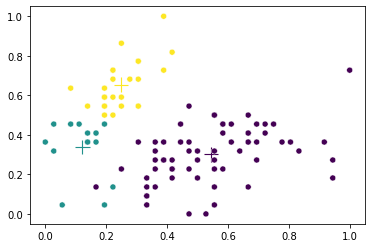

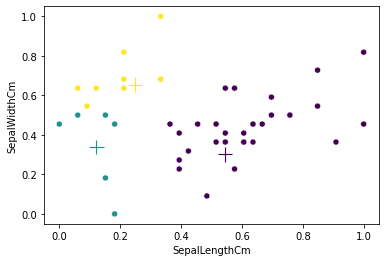

In [7]:
sns.scatterplot(x=model.centroids[:, 0], y=model.centroids[:, 1], marker="+", s=200, c=range(len(model.centroids)))
sns.scatterplot(x=model.x[:, 0], y=model.x[:, 1], c=model.labels)
plt.show()

sns.scatterplot(x=model.centroids[:, 0], y=model.centroids[:, 1], marker="+", s=200, c=range(len(model.centroids)))
sns.scatterplot(x=test['SepalLengthCm'], y=test['SepalWidthCm'], c=pred_labels)
plt.show()